# Tensorflow and Keras

## Modeling

Let's review some modeling concepts we've used to date with [this quick exercise](https://forms.gle/yrPxUp2Xj4R9FeyEA)


We do this to remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as that are with _sklearn_ or _statsmodels_.

The above exercise uses only one train-test split, but is still useful.  We will be using train, validation, test in this notebook, for good practice.

## Objectives:
- Compare pros and cons of Keras vs TensorFlow
- hands on practice coding a neural network

In [1]:
import keras

Using TensorFlow backend.
/Users/johnmaxbarry/anaconda3/envs/learn-env_2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/johnmaxbarry/anaconda3/envs/learn-env_2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/johnmaxbarry/anaconda3/envs/learn-env_2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

Wait a second, what is that warning? 
`Using TensorFlow backend.`

<img align =left src="img/keras.png"><br>
### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](img/keras_tf_theano.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

Theano has been discontinued.  The last release was 2017, but can still be used.

We will use TensorFlow, as it is the most popular. TensorFlow became the most used Keras backend, and  eventually integrated Keras into via the tf.keras submodule of TensorFlow.  

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](img/cat-tensors.gif)

For our numbers dataset, our tensors from the sklearn dataset were originally tensors of the shape 8x8, i.e.64 pictures.  Remember, that was with black and white images.

For image processing, we are often dealing with color.

In [2]:
from sklearn.datasets import load_sample_images
image = load_sample_images()['images'][0]

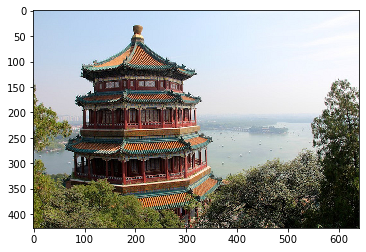

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(image)

In [4]:
image.shape

(427, 640, 3)

What do the dimensions of our image above represent?

In [12]:
import numpy as np
from matplotlib import pyplot as plt


# This is always a good idea
%load_ext autoreload
%autoreload 2
    
from src.student_caller import one_random_student, three_random_students
from src.student_list import student_first_names
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
one_random_student(student_first_names)

Ali


Tensors with higher numbers of dimensions have a higher **rank**, in the language of TensorFlow.

A matrix with rows and columns only, like the black and white numbers, are **rank 2**.

A matrix with a third dimension, like the color pictures above, are **rank 3**.

When we flatten an image by stacking the rows in a column, we are decreasing the rank. 

In [7]:
flat_image = image.reshape(-1,1)

When we unrow a column, we increase its rank.

In [8]:
unrowed = flat_image.reshape(427,640, -1)

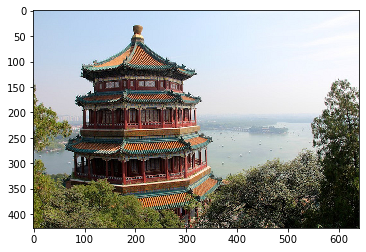

In [9]:
imgplot = plt.imshow(unrowed)


## TensorFLow has more levers and buttons, but Keras is more user friendly

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](img/levers.jpeg)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit more complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

# Now let's get our feet wet

Let's import the numbers dataset we used this morning.

In [63]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target


#### Getting data ready for modeling
**Preprocessing**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.
- Scale the pixel intensity to a value between 0 and 1.


Scaling our input variables will help speed up our neural network [see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16). 

In [209]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


Now that our data is ready, let's load in the keras Sequential class.  

In this lesson, we are only proceeding with feed forward models.  Our network proceeds layer by layer in sequence.

Sequential refers to a sequence of layers that feed directly into one another with exactly [one input tensor and one output tensor](https://www.tensorflow.org/guide/keras/sequential_model)

In [210]:
# Import the Sequential model from the models module

# Instantiate an instance of the Sequential model

In [211]:
#__SOLUTION__

# Import the Sequential model from the models module

from keras.models import Sequential

model = Sequential()

Now we want to specify the type for our first hidden layer.

To begin, we will only deal with dense layers.  Remember, dense means fully connected.  Every neuron passes a signal to every neuron in the next layer.

In [212]:
# Import Dense from layers


In [213]:
#__SOLUTION__
# Import Dense from layers

from keras.layers import Dense

For our first hidden layer, we need to specify both the number of neurons in the layer, the activation function, and the dimensions of our input.

Let's start with 4 neurons with a Relu activation function.

In [214]:
#__SOLUTION__
# We use model.add to add a layer.  Pass Dense() to model.add, with the parameters specified above
# hints: 'relu', 'input_dim'

model.add(Dense(units=4, activation='relu', input_dim=64))


For this simple network, let's output directly from one hidden layer to the output layer.

To do so, we have to choose an appropriate activation function which mirrors the sample space of our potential outcomes.

What activation should we use for our output layer?

In [215]:
one_random_student(student_first_names)

Hunter


In [216]:
#__SOLUTION__
# add another layer with the appropriate units and activation function. 
# We use the same syntax as the first hidden layer

model.add(Dense(units=10, activation='softmax'))

Lastly, for this simple model, we have to define a loss function, a metric, and an optimizer.

Optimizers are functions which update our weights in smart ways instead of treating all parameters equaly. Adam, a popular optimizer, calculates an individual learning rate for each parameter. Here is a list of available optimizers in Keras: [optimizers](https://keras.io/api/optimizers/)

In [217]:
# pass arguments for loss function, metric, and optimizer to the compile parameter


In [218]:
#__SOLUTION__

# pass arguments for loss function, metrics, and optimizer to the compile parameter

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])



Now we can fit our model in a similar way as we did our sklearn models, using a .fit method.

Before we do so, we have to convert out target values into a form Keras requires. 

In [219]:
# Use sklearn's OneHotEncoder to transform our target
from sklearn.preprocessing import OneHotEncoder


In [220]:
# Use sklearn's OneHotEncoder to transform our target

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_t_ohe = ohe.fit_transform(y_t.reshape(-1,1))

In [221]:
# Now pass X_t and y_t_ohe to our fit method
model.fit(X_t, y_t_ohe)

Epoch 1/1
1149/1149 [==============================] - 1s 520us/step - loss: 2.3187 - accuracy: 0.1062


That did not do so well.  Our fit model now has the ability to predict.  

In [222]:
# Use predict and predict_classes on our validation set.

In [223]:
#__SOLUTION__
model.predict(X_val)

array([[0.11357734, 0.09098841, 0.10107927, ..., 0.09712718, 0.09657137,
        0.10864265],
       [0.09917969, 0.10073923, 0.09877504, ..., 0.09985751, 0.10142097,
        0.09844097],
       [0.16393128, 0.0655373 , 0.1049461 , ..., 0.0869078 , 0.08119129,
        0.14072955],
       ...,
       [0.09917969, 0.10073923, 0.09877504, ..., 0.09985751, 0.10142097,
        0.09844097],
       [0.10470171, 0.07636297, 0.09892192, ..., 0.08346069, 0.08387157,
        0.12050442],
       [0.11369722, 0.09091315, 0.10109573, ..., 0.09710387, 0.09653191,
        0.10872547]], dtype=float32)

In [224]:
#__SOLUTION__
model.predict_classes(X_val)

array([0, 6, 0, 0, 9, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 6, 0, 0, 6, 0, 0, 0, 0, 6, 0, 6, 0, 0, 3, 0, 9, 0, 0, 0, 6, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 6, 0, 3, 6, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 9, 0, 0, 6, 4, 0, 6, 6, 6, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 6, 6, 0, 6, 0, 0, 0, 0, 6, 3, 0, 6,
       6, 0, 6, 6, 0, 6, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6,
       0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 6, 6, 0, 0, 6, 0,
       0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 6,
       0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 6, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 7, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 7, 6, 0, 0, 0, 0, 0, 0, 6,
       4, 0])

We can also add validation data to the fit method to track its progress across epochs.

In [225]:
#  First, One Hot Encode our y_val

y_val_ohe = ohe.transform(y_val.reshape(-1,1))

In [226]:
model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe))

Train on 1149 samples, validate on 288 samples
Epoch 1/1
1149/1149 [==============================] - 0s 350us/step - loss: 2.2940 - accuracy: 0.1558 - val_loss: 2.2867 - val_accuracy: 0.1215


As expected, it performs worse on the validation set.

Now let's improve our model.

To begin, let's allow our algorithm to train for a longer.  To do so, we increase the epochs

In [227]:
# Change the epoch parameter in the fit method from 1 to 5.


In [228]:
#__SOLUTION__
# Change the epoch parameter in the fit method from 1 to 5.

model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=5)

Train on 1149 samples, validate on 288 samples
Epoch 1/5
1149/1149 [==============================] - 0s 120us/step - loss: 2.2690 - accuracy: 0.2019 - val_loss: 2.2569 - val_accuracy: 0.1910
Epoch 2/5
1149/1149 [==============================] - 0s 82us/step - loss: 2.2333 - accuracy: 0.2158 - val_loss: 2.2207 - val_accuracy: 0.2465
Epoch 3/5
1149/1149 [==============================] - 0s 70us/step - loss: 2.1958 - accuracy: 0.2272 - val_loss: 2.1859 - val_accuracy: 0.2569
Epoch 4/5
1149/1149 [==============================] - 0s 73us/step - loss: 2.1574 - accuracy: 0.2550 - val_loss: 2.1458 - val_accuracy: 0.2674
Epoch 5/5
1149/1149 [==============================] - 0s 73us/step - loss: 2.1155 - accuracy: 0.2768 - val_loss: 2.1077 - val_accuracy: 0.2917


Now our loss is going down and accuracy is going up a bit. 

Let's plot our loss across epochs. In order to do that, we have to store the results of our model.


In [229]:
# run model.fit() again, but this time assign it to a variable results


In [230]:
#__SOLUTION__
# run model.fit() again, but this time assign it to a variable results
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=5)


Train on 1149 samples, validate on 288 samples
Epoch 1/5
1149/1149 [==============================] - 0s 110us/step - loss: 2.0729 - accuracy: 0.2933 - val_loss: 2.0643 - val_accuracy: 0.2986
Epoch 2/5
1149/1149 [==============================] - 0s 98us/step - loss: 2.0250 - accuracy: 0.3064 - val_loss: 2.0086 - val_accuracy: 0.3229
Epoch 3/5
1149/1149 [==============================] - 0s 70us/step - loss: 1.9680 - accuracy: 0.3159 - val_loss: 1.9451 - val_accuracy: 0.3368
Epoch 4/5
1149/1149 [==============================] - 0s 84us/step - loss: 1.9106 - accuracy: 0.3481 - val_loss: 1.8842 - val_accuracy: 0.3472
Epoch 5/5
1149/1149 [==============================] - 0s 70us/step - loss: 1.8545 - accuracy: 0.3490 - val_loss: 1.8287 - val_accuracy: 0.3576


In [231]:
# Let's look at the contents of results.history
results.history


{'val_loss': [2.064333359400431,
  2.008648488256666,
  1.9451360172695584,
  1.8841922415627375,
  1.8287294573254056],
 'val_accuracy': [0.2986111044883728,
  0.3229166567325592,
  0.3368055522441864,
  0.3472222089767456,
  0.3576388955116272],
 'loss': [2.0729144607241823,
  2.024991624556592,
  1.9679545113270547,
  1.9105889560659624,
  1.8545353879505286],
 'accuracy': [0.2932985, 0.30635336, 0.31592688, 0.3481288, 0.34899914]}

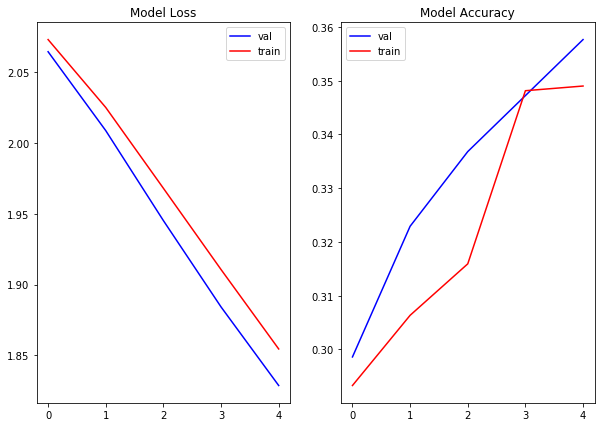

In [232]:
# We can now plot our loss and accuracy against results.epoch

def plot_results(results):
    
    '''
    After running a model, plot the training and validation
    scores for both loss and accuracy.
    '''
    
    val_loss = results.history['val_loss']
    train_loss = results.history['loss']

    val_accuracy = results.history['val_accuracy']
    train_accuracy = results.history['accuracy']

    fig, ax = plt.subplots(1,2, figsize=(10,7))

    ax[0].plot(results.epoch, val_loss, c='b', label='val')
    ax[0].plot(results.epoch, train_loss, c='r', label='train')
    ax[0].legend()
    ax[0].set_title('Model Loss')

    ax[1].plot(results.epoch, val_accuracy, c='b', label='val')
    ax[1].plot(results.epoch, train_accuracy, c='r', label='train')
    ax[1].set_title('Model Accuracy')

    ax[1].legend()
    

plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 0s 115us/step - loss: 1.8045 - accuracy: 0.3507 - val_loss: 1.7807 - val_accuracy: 0.3576
Epoch 2/10
1149/1149 [==============================] - 0s 94us/step - loss: 1.7588 - accuracy: 0.3655 - val_loss: 1.7387 - val_accuracy: 0.3576
Epoch 3/10
1149/1149 [==============================] - 0s 87us/step - loss: 1.7186 - accuracy: 0.3690 - val_loss: 1.7006 - val_accuracy: 0.3576
Epoch 4/10
1149/1149 [==============================] - 0s 70us/step - loss: 1.6825 - accuracy: 0.3664 - val_loss: 1.6675 - val_accuracy: 0.3542
Epoch 5/10
1149/1149 [==============================] - 0s 72us/step - loss: 1.6494 - accuracy: 0.3742 - val_loss: 1.6368 - val_accuracy: 0.3646
Epoch 6/10
1149/1149 [==============================] - 0s 77us/step - loss: 1.6201 - accuracy: 0.3795 - val_loss: 1.6084 - val_accuracy: 0.3681
Epoch 7/10
1149/1149 [==============================] - 0s 75us/step - loss: 1.592

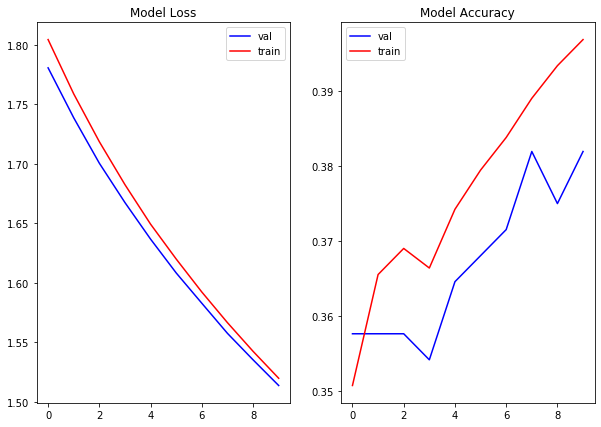

In [233]:
# Let's see what happens if we add more epochs
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

After 10 epochs, are model is still learning steadily.

Instead of adding more epochs, let's deepen our network by adding another hidden layer. There are no hard set rules for building neural networks. It is an empirical process, where one tries different architectures and see what works.  However, it is a good idea to try out deep networks, since we know that successive layers find increasingly complex patterns.

In [206]:
# current state of our model.  Add another hidden layer with 6 neurons
model.add(Dense(units=4, activation='relu', input_dim=64))

model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)


Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 3s 2ms/step - loss: 2.2395 - accuracy: 0.1723 - val_loss: 2.1497 - val_accuracy: 0.1736
Epoch 2/10
1149/1149 [==============================] - 0s 201us/step - loss: 2.0692 - accuracy: 0.2620 - val_loss: 1.9543 - val_accuracy: 0.2882
Epoch 3/10
1149/1149 [==============================] - 0s 201us/step - loss: 1.8954 - accuracy: 0.3359 - val_loss: 1.8002 - val_accuracy: 0.3646
Epoch 4/10
1149/1149 [==============================] - 0s 206us/step - loss: 1.7238 - accuracy: 0.3551 - val_loss: 1.6077 - val_accuracy: 0.3681
Epoch 5/10
1149/1149 [==============================] - 0s 201us/step - loss: 1.5618 - accuracy: 0.3638 - val_loss: 1.4898 - val_accuracy: 0.4375
Epoch 6/10
1149/1149 [==============================] - 0s 218us/step - loss: 1.5248 - accuracy: 0.3734 - val_loss: 1.4468 - val_accuracy: 0.4167
Epoch 7/10
1149/1149 [==============================] - 0s 222us/step - loss: 1

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 2s 1ms/step - loss: 2.2969 - accuracy: 0.0661 - val_loss: 2.2879 - val_accuracy: 0.0903
Epoch 2/10
1149/1149 [==============================] - 0s 111us/step - loss: 2.2725 - accuracy: 0.0914 - val_loss: 2.2651 - val_accuracy: 0.0868
Epoch 3/10
1149/1149 [==============================] - 0s 129us/step - loss: 2.2455 - accuracy: 0.1166 - val_loss: 2.2358 - val_accuracy: 0.1493
Epoch 4/10
1149/1149 [==============================] - 0s 136us/step - loss: 2.2140 - accuracy: 0.1314 - val_loss: 2.2036 - val_accuracy: 0.1701
Epoch 5/10
1149/1149 [==============================] - 0s 117us/step - loss: 2.1806 - accuracy: 0.1349 - val_loss: 2.1662 - val_accuracy: 0.1701
Epoch 6/10
1149/1149 [==============================] - 0s 106us/step - loss: 2.1431 - accuracy: 0.1697 - val_loss: 2.1276 - val_accuracy: 0.2049
Epoch 7/10
1149/1149 [==============================] - 0s 117us/step - loss: 2

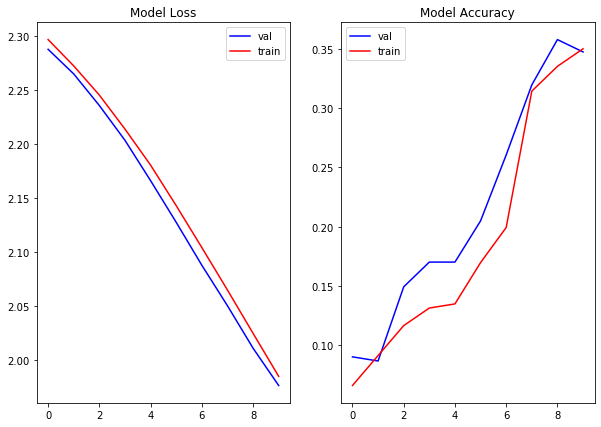

In [246]:
#__SOLUTION__
# current state of our model.  Add another hidden layer with 6 neurons
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 2s 1ms/step - loss: 2.3064 - accuracy: 0.1323 - val_loss: 2.2856 - val_accuracy: 0.1667
Epoch 2/10
1149/1149 [==============================] - 0s 130us/step - loss: 2.2725 - accuracy: 0.1715 - val_loss: 2.2585 - val_accuracy: 0.1458
Epoch 3/10
1149/1149 [==============================] - 0s 125us/step - loss: 2.2224 - accuracy: 0.1889 - val_loss: 2.1971 - val_accuracy: 0.1458
Epoch 4/10
1149/1149 [==============================] - 0s 132us/step - loss: 2.1387 - accuracy: 0.2054 - val_loss: 2.1154 - val_accuracy: 0.1875
Epoch 5/10
1149/1149 [==============================] - 0s 122us/step - loss: 2.0530 - accuracy: 0.2228 - val_loss: 2.0442 - val_accuracy: 0.2014
Epoch 6/10
1149/1149 [==============================] - 0s 128us/step - loss: 1.9814 - accuracy: 0.2289 - val_loss: 1.9856 - val_accuracy: 0.2326
Epoch 7/10
1149/1149 [==============================] - 0s 125us/step - loss: 1

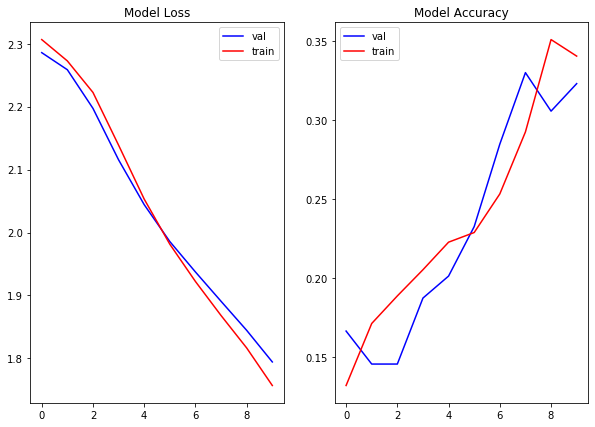

In [247]:
# Let's make it even deeper by adding another hidden layer

#__SOLUTION__
# current state of our model.  Add another hidden layer with 6 neurons
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu' ))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

What else can we do do try to improve our network?

So far, we have been applying batch gradient descent. Let's try mini-batch

To do so, we add a batch size to our fit.

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 2s 1ms/step - loss: 2.2915 - accuracy: 0.0836 - val_loss: 2.2787 - val_accuracy: 0.1458
Epoch 2/10
1149/1149 [==============================] - 0s 103us/step - loss: 2.2731 - accuracy: 0.1236 - val_loss: 2.2549 - val_accuracy: 0.1493
Epoch 3/10
1149/1149 [==============================] - 0s 106us/step - loss: 2.2433 - accuracy: 0.1436 - val_loss: 2.2137 - val_accuracy: 0.1701
Epoch 4/10
1149/1149 [==============================] - 0s 106us/step - loss: 2.1974 - accuracy: 0.1558 - val_loss: 2.1542 - val_accuracy: 0.1875
Epoch 5/10
1149/1149 [==============================] - 0s 100us/step - loss: 2.1340 - accuracy: 0.2280 - val_loss: 2.0828 - val_accuracy: 0.2986
Epoch 6/10
1149/1149 [==============================] - 0s 102us/step - loss: 2.0611 - accuracy: 0.2367 - val_loss: 2.0095 - val_accuracy: 0.2951
Epoch 7/10
1149/1149 [==============================] - 0s 105us/step - loss: 1

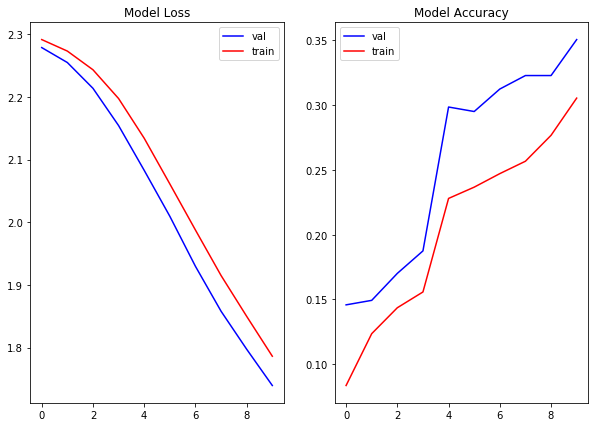

In [249]:
# Let's make it even deeper by adding another hidden layer

#__SOLUTION__
# current state of our model.  Add another hidden layer with 6 neurons
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10, batch_size=42)
plot_results(results)

We can even try out true stochastic gradient descent, though it may take a will.

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 6s 5ms/step - loss: 2.1630 - accuracy: 0.1941 - val_loss: 1.9970 - val_accuracy: 0.2361
Epoch 2/10
1149/1149 [==============================] - 4s 4ms/step - loss: 1.7734 - accuracy: 0.3151 - val_loss: 1.6840 - val_accuracy: 0.2812
Epoch 3/10
1149/1149 [==============================] - 4s 4ms/step - loss: 1.5348 - accuracy: 0.3873 - val_loss: 1.5168 - val_accuracy: 0.3993
Epoch 4/10
1149/1149 [==============================] - 4s 3ms/step - loss: 1.3849 - accuracy: 0.4943 - val_loss: 1.4037 - val_accuracy: 0.4236
Epoch 5/10
1149/1149 [==============================] - 4s 3ms/step - loss: 1.2791 - accuracy: 0.5579 - val_loss: 1.2948 - val_accuracy: 0.5486
Epoch 6/10
1149/1149 [==============================] - 4s 3ms/step - loss: 1.1851 - accuracy: 0.6057 - val_loss: 1.2062 - val_accuracy: 0.5903
Epoch 7/10
1149/1149 [==============================] - 4s 3ms/step - loss: 1.1087 - accu

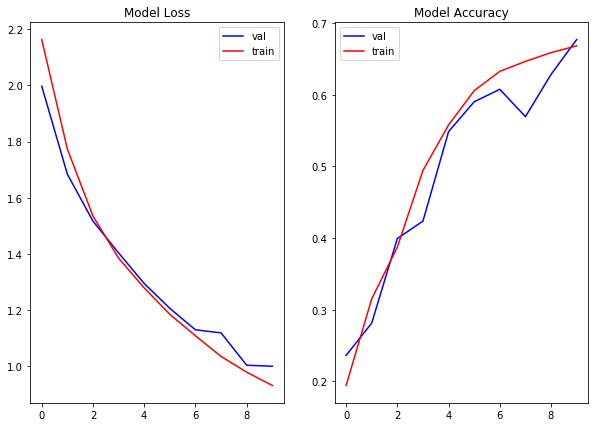

In [256]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10, batch_size=1)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/20
1149/1149 [==============================] - 6s 5ms/step - loss: 2.1602 - accuracy: 0.1723 - val_loss: 1.9876 - val_accuracy: 0.1910
Epoch 2/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.7291 - accuracy: 0.2985 - val_loss: 1.6639 - val_accuracy: 0.3681
Epoch 3/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.4741 - accuracy: 0.4378 - val_loss: 1.4650 - val_accuracy: 0.4306
Epoch 4/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.3041 - accuracy: 0.5057 - val_loss: 1.3631 - val_accuracy: 0.4757
Epoch 5/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.1823 - accuracy: 0.5614 - val_loss: 1.2038 - val_accuracy: 0.5417
Epoch 6/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.0982 - accuracy: 0.6110 - val_loss: 1.1695 - val_accuracy: 0.5451
Epoch 7/20
1149/1149 [==============================] - 4s 4ms/step - loss: 1.0327 - accu

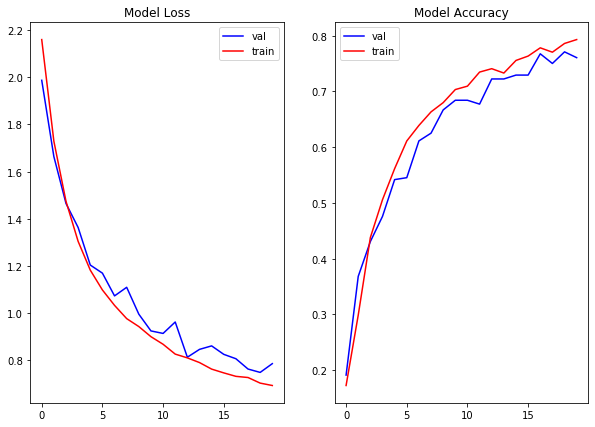

In [263]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=20, batch_size=1)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/200
1149/1149 [==============================] - 2s 2ms/step - loss: 2.3052 - accuracy: 0.1079 - val_loss: 2.2911 - val_accuracy: 0.1458
Epoch 2/200
1149/1149 [==============================] - 0s 230us/step - loss: 2.2829 - accuracy: 0.1245 - val_loss: 2.2562 - val_accuracy: 0.1528
Epoch 3/200
1149/1149 [==============================] - 0s 232us/step - loss: 2.2523 - accuracy: 0.1384 - val_loss: 2.2152 - val_accuracy: 0.1528
Epoch 4/200
1149/1149 [==============================] - 0s 214us/step - loss: 2.2086 - accuracy: 0.1419 - val_loss: 2.1617 - val_accuracy: 0.1528
Epoch 5/200
1149/1149 [==============================] - 0s 233us/step - loss: 2.1541 - accuracy: 0.1593 - val_loss: 2.1054 - val_accuracy: 0.1875
Epoch 6/200
1149/1149 [==============================] - 0s 239us/step - loss: 2.0934 - accuracy: 0.1715 - val_loss: 2.0524 - val_accuracy: 0.2188
Epoch 7/200
1149/1149 [==============================] - 0s 209us/step - 

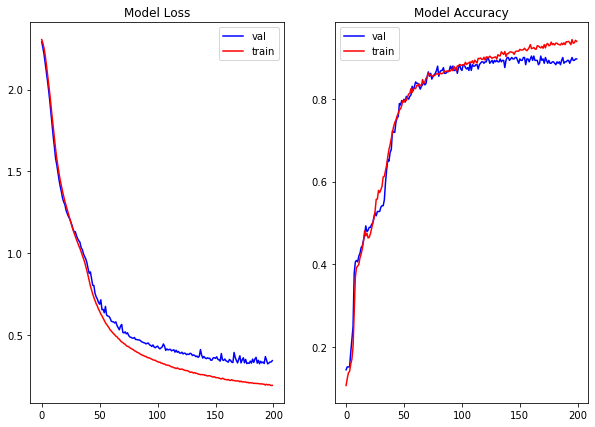

In [271]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=200, batch_size=20)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/100
1149/1149 [==============================] - 2s 2ms/step - loss: 2.2630 - accuracy: 0.1123 - val_loss: 2.2446 - val_accuracy: 0.1354
Epoch 2/100
1149/1149 [==============================] - 0s 287us/step - loss: 2.1950 - accuracy: 0.1697 - val_loss: 2.1714 - val_accuracy: 0.2118
Epoch 3/100
1149/1149 [==============================] - 0s 295us/step - loss: 2.1117 - accuracy: 0.2124 - val_loss: 2.0855 - val_accuracy: 0.2118
Epoch 4/100
1149/1149 [==============================] - 0s 303us/step - loss: 2.0197 - accuracy: 0.2298 - val_loss: 1.9961 - val_accuracy: 0.2257
Epoch 5/100
1149/1149 [==============================] - 0s 313us/step - loss: 1.9256 - accuracy: 0.2524 - val_loss: 1.9052 - val_accuracy: 0.2361
Epoch 6/100
1149/1149 [==============================] - 0s 338us/step - loss: 1.8382 - accuracy: 0.2846 - val_loss: 1.8107 - val_accuracy: 0.2917
Epoch 7/100
1149/1149 [==============================] - 0s 304us/step - 

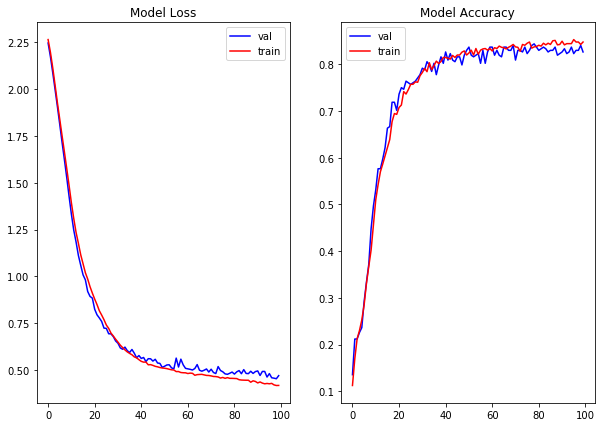

In [268]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="RMSProp", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=100, batch_size=15)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/100
1149/1149 [==============================] - 2s 2ms/step - loss: 2.3019 - accuracy: 0.1027 - val_loss: 2.2963 - val_accuracy: 0.0938
Epoch 2/100
1149/1149 [==============================] - 0s 304us/step - loss: 2.2846 - accuracy: 0.1488 - val_loss: 2.2624 - val_accuracy: 0.1667
Epoch 3/100
1149/1149 [==============================] - 0s 311us/step - loss: 2.2378 - accuracy: 0.1636 - val_loss: 2.1970 - val_accuracy: 0.1632
Epoch 4/100
1149/1149 [==============================] - 0s 308us/step - loss: 2.1704 - accuracy: 0.2010 - val_loss: 2.1255 - val_accuracy: 0.1806
Epoch 5/100
1149/1149 [==============================] - 0s 314us/step - loss: 2.1083 - accuracy: 0.2097 - val_loss: 2.0713 - val_accuracy: 0.1944
Epoch 6/100
1149/1149 [==============================] - 0s 358us/step - loss: 2.0613 - accuracy: 0.2141 - val_loss: 2.0468 - val_accuracy: 0.2083
Epoch 7/100
1149/1149 [==============================] - 0s 325us/step - 

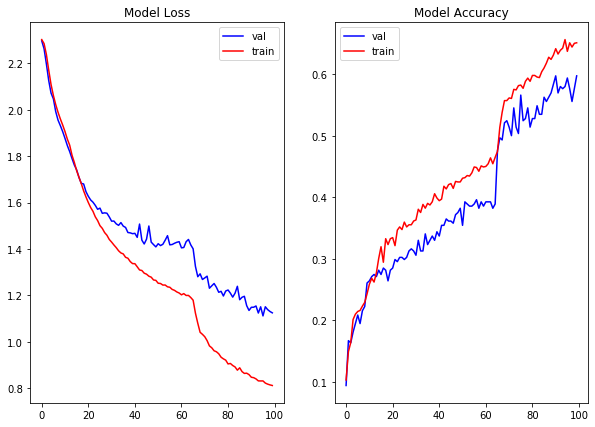

In [269]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=200, batch_size=15)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/200
1149/1149 [==============================] - 2s 2ms/step - loss: 2.2607 - accuracy: 0.1549 - val_loss: 2.2299 - val_accuracy: 0.1944
Epoch 2/200
1149/1149 [==============================] - 0s 153us/step - loss: 2.2132 - accuracy: 0.1950 - val_loss: 2.1733 - val_accuracy: 0.2465
Epoch 3/200
1149/1149 [==============================] - 0s 160us/step - loss: 2.1561 - accuracy: 0.2054 - val_loss: 2.1094 - val_accuracy: 0.2257
Epoch 4/200
1149/1149 [==============================] - 0s 157us/step - loss: 2.0864 - accuracy: 0.1819 - val_loss: 2.0364 - val_accuracy: 0.1840
Epoch 5/200
1149/1149 [==============================] - 0s 158us/step - loss: 2.0121 - accuracy: 0.2010 - val_loss: 1.9597 - val_accuracy: 0.1701
Epoch 6/200
1149/1149 [==============================] - 0s 172us/step - loss: 1.9346 - accuracy: 0.2585 - val_loss: 1.8923 - val_accuracy: 0.2257
Epoch 7/200
1149/1149 [==============================] - 0s 164us/step - 

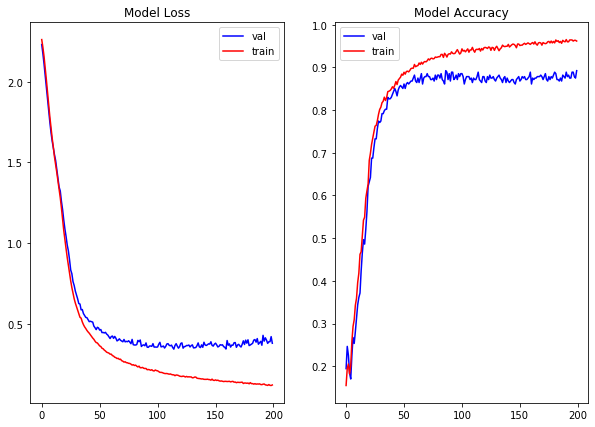

In [273]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=200, batch_size=32)
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 2s 2ms/step - loss: 2.2894 - accuracy: 0.1079 - val_loss: 2.2852 - val_accuracy: 0.0764
Epoch 2/500
1149/1149 [==============================] - 0s 158us/step - loss: 2.2619 - accuracy: 0.1166 - val_loss: 2.2562 - val_accuracy: 0.0868
Epoch 3/500
1149/1149 [==============================] - 0s 155us/step - loss: 2.2203 - accuracy: 0.1436 - val_loss: 2.2064 - val_accuracy: 0.1250
Epoch 4/500
1149/1149 [==============================] - 0s 164us/step - loss: 2.1537 - accuracy: 0.1732 - val_loss: 2.1124 - val_accuracy: 0.1146
Epoch 5/500
1149/1149 [==============================] - 0s 159us/step - loss: 2.0509 - accuracy: 0.1697 - val_loss: 1.9933 - val_accuracy: 0.1493
Epoch 6/500
1149/1149 [==============================] - 0s 166us/step - loss: 1.9419 - accuracy: 0.1958 - val_loss: 1.8811 - val_accuracy: 0.2257
Epoch 7/500
1149/1149 [==============================] - 0s 161us/step - 

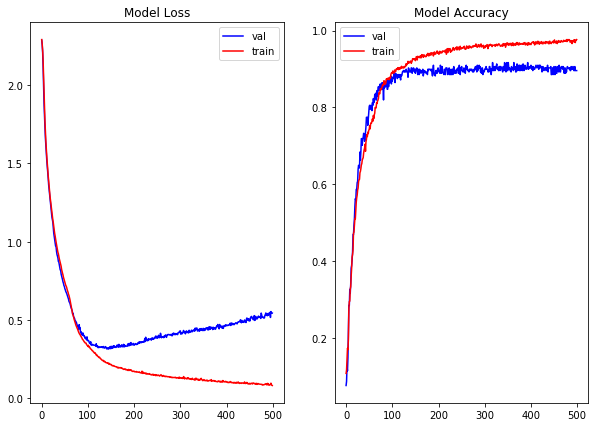

In [274]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=500, batch_size=32)
plot_results(results)

### Pair Challenge:

<img src="https://images.pexels.com/photos/1350560/pexels-photo-1350560.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" alt="diabetes" style ="text-align:center;width:250px;float:none" ></br>

Let's use a Keras neural net on the UCI digit dataset we imported from sklearn yesterday.

Let's continue where we left off with our numbers dataset.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target


We will start with a binary classification, and predict whether the number will be even or odd.

In [21]:
y_binary = y % 2
y_binary

array([0, 1, 0, ..., 0, 1, 0])

In pairs, proceed through the following three parts. 

#### Part 1:
Questions to answer:
- How many input variables are there in this dataset? 
- What does the range of values (0-16) represent in our feature set?
- What does a 1 mean in our target class?
- If we use a neural net to predict this, what loss function do we use?
***

***
#### Part 2:
What if you wanted to create a NN with hidden layers to predict even numbers with:
- 12 nodes in the first hidden layer
- 8 nodes in the second hidden layer
- relu on the first two activations
- sigmoid on the last one

Answer the following questions:
- How many nodes in the input layer?
- How many nodes in the output layer?
- Will the output layer produce an integer or a float?
***

***

#### Part 3:
Knowing that you want:
- batch size of 10
- 50 epochs
- to use `rmsprop` as your optimizer
- and all the numbers you defined above...

**Fill out the code below with the correct specifications, but don't run it yet**

In [30]:
model = Sequential()
model.add(Dense(   , activation= , input_dim= ))
model.add(Dense( ,  activation= ))
model.add(Dense(  , activation =  ))

model.compile(optimizer= ,
              loss=,
              metrics=['accuracy'])
model.fit(data, labels, epochs=, batch_size=  )

SyntaxError: invalid syntax (<ipython-input-30-990b674031ad>, line 2)

In [32]:
#__SOLUTION__

model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='rmsprop' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])
model.fit(X, y_binary, epochs=50, batch_size= 10 )

Epoch 1/50
1797/1797 [==============================] - 1s 405us/step - loss: 0.7276 - accuracy: 0.6767
Epoch 2/50
1797/1797 [==============================] - 0s 140us/step - loss: 0.3261 - accuracy: 0.8587
Epoch 3/50
1797/1797 [==============================] - 0s 142us/step - loss: 0.2352 - accuracy: 0.9065
Epoch 4/50
1797/1797 [==============================] - 0s 142us/step - loss: 0.1928 - accuracy: 0.9210
Epoch 5/50
1797/1797 [==============================] - 0s 138us/step - loss: 0.1589 - accuracy: 0.9377
Epoch 6/50
1797/1797 [==============================] - 0s 146us/step - loss: 0.1349 - accuracy: 0.94880s - loss: 0.1501 - accura
Epoch 7/50
1797/1797 [==============================] - 0s 142us/step - loss: 0.1151 - accuracy: 0.9549
Epoch 8/50
1797/1797 [==============================] - 0s 161us/step - loss: 0.1008 - accuracy: 0.9633
Epoch 9/50
1797/1797 [==============================] - 0s 163us/step - loss: 0.0915 - accuracy: 0.9661
Epoch 10/50
1797/1797 [===============

### Things to know:
- the data and labels in `fit()` need to be numpy arrays, not pandas dfs. Else it won't work.
- Scaling your data will have a large impact on your model.   
   > For our traditional input features, we would use a scalar object.  For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

![gif](https://media0.giphy.com/media/3og0IMJcSI8p6hYQXS/giphy.gif)


We have come across several scenerios where scaling is important. In addition to improving the speed of gradient descent, what other scenarios did we stress scaling?

In [16]:
one_random_student(mccalister)

NameError: name 'mccalister' is not defined

#### Getting data ready for modeling
**Preprocessing**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.
- Scale the pixel intensity to a value between 0 and 1.


Scaling our input variables will help speed up our neural network [see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16). 

In [35]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


Now that our data is ready, let's load in the keras Sequential class.  

Sequential refers to a sequence of layers that feed directly into one another with exactly [one input tensor and one output tensor](https://www.tensorflow.org/guide/keras/sequential_model)

In [47]:
from keras.models import Sequential

A dense layer receives input from every node from the previous layer.

In [37]:
from keras.layers import Dense

Let's start working through the different choices we can make in our network.

For activation, let's start with the familiar sigmoid function, and see how it performs.

In [38]:
np.random.seed(42)
model = Sequential()
# We will start with our trusty sigmoid function.
# What does input dimension correspond to?
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              # We use binary_crossentropy for a binary loss function
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 0s 309us/step - loss: 0.7928 - accuracy: 0.5039
Epoch 2/10
1149/1149 [==============================] - 0s 20us/step - loss: 0.7743 - accuracy: 0.5039
Epoch 3/10
1149/1149 [==============================] - 0s 17us/step - loss: 0.7593 - accuracy: 0.5039
Epoch 4/10
1149/1149 [==============================] - 0s 18us/step - loss: 0.7465 - accuracy: 0.5039
Epoch 5/10
1149/1149 [==============================] - 0s 19us/step - loss: 0.7360 - accuracy: 0.5039
Epoch 6/10
1149/1149 [==============================] - 0s 18us/step - loss: 0.7273 - accuracy: 0.5039
Epoch 7/10
1149/1149 [==============================] - 0s 19us/step - loss: 0.7200 - accuracy: 0.5039
Epoch 8/10
1149/1149 [==============================] - 0s 18us/step - loss: 0.7143 - accuracy: 0.5039
Epoch 9/10
1149/1149 [==============================] - 0s 20us/step - loss: 0.7094 - accuracy: 0.5039
Epoch 10/10
1149/1149 [==============================] - 0s 18us/step - 

We can access the history of our model via `results.history`.
Use __dict__ to take a tour.

In [39]:
results.__dict__

{'validation_data': [],
 'model': <keras.engine.sequential.Sequential at 0x1a4aaf3160>,
 'params': {'batch_size': 100,
  'epochs': 10,
  'steps': None,
  'samples': 1149,
  'verbose': 1,
  'do_validation': False,
  'metrics': ['loss', 'accuracy']},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'history': {'loss': [0.7928334438769686,
   0.7742922240179243,
   0.7593016477643769,
   0.7464719206172554,
   0.7359635434117495,
   0.7273100947067984,
   0.7200161042786143,
   0.7143256540294312,
   0.7094395829346826,
   0.7056822033941071],
  'accuracy': [0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644,
   0.50391644]}}

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, results.history['loss'], ax=ax1, label='loss')
sns.lineplot(results.epoch, results.history['acc'], ax=ax2, label='accuracy')

KeyError: 'acc'

We have two plots above both relating to the quality fo our model.  The left-hand plot is our loss. It uses the probabilities associated with our predictions to judge how well our prediction fits reality. We want it to decrease as far as possible.

The accuracy judges how well the predictions are after applying the threshold at the output layer.  We want accuracy to increase.

If we look at our loss, it is still decreasing. That is a signal that our model is **still learning**. If our model is still learning, we can allow it to get better by turning several dials. First, let's increase the number of epochs.

In [41]:
# Review: what is an epoch?
one_random_student(mccalister)

NameError: name 'mccalister' is not defined

In [42]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1149/1149 [==============================] - 0s 339us/step - loss: 0.7158 - accuracy: 0.4961
Epoch 2/50
1149/1149 [==============================] - 0s 48us/step - loss: 0.7014 - accuracy: 0.4961
Epoch 3/50
1149/1149 [==============================] - 0s 48us/step - loss: 0.6934 - accuracy: 0.4961
Epoch 4/50
1149/1149 [==============================] - 0s 49us/step - loss: 0.6886 - accuracy: 0.4961
Epoch 5/50
1149/1149 [==============================] - 0s 49us/step - loss: 0.6858 - accuracy: 0.4961
Epoch 6/50
1149/1149 [==============================] - 0s 48us/step - loss: 0.6840 - accuracy: 0.5100
Epoch 7/50
1149/1149 [==============================] - 0s 47us/step - loss: 0.6828 - accuracy: 0.5440
Epoch 8/50
1149/1149 [==============================] - 0s 46us/step - loss: 0.6819 - accuracy: 0.6310
Epoch 9/50
1149/1149 [==============================] - 0s 42us/step - loss: 0.6811 - accuracy: 0.6667
Epoch 10/50
1149/1149 [==============================] - 0s 50us/step - 

In [44]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_accuracy, ax=ax2, label='accuracy')

KeyError: 'acc'

It still looks like our model has not **converged**. Convergence is when our model has plateaued after adjusting the parameters to their optimal values. 

The loss is still decreasing, and the accuracy is still increasing.  We could continue increasing the epochs, but that will be time consuming.  

We could try decreasing the batch size. Let's set the batch size to 1.  This is true stochastic gradient descent.  The parameters are updated after each sample is passed into the model.

SGD with a small batch size takes longer to run through an epoch, but will take less epochs to improve.

In [45]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.6983 - accuracy: 0.5091
Epoch 2/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4891
Epoch 3/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5100
Epoch 4/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6854 - accuracy: 0.5579
Epoch 5/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6763 - accuracy: 0.6197
Epoch 6/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6572 - accuracy: 0.7076
Epoch 7/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6162 - accuracy: 0.7920
Epoch 8/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.8251
Epoch 9/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8503
Epoch 10/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.360

In [ ]:
sigmoid_one_loss = results.history['loss']
sigmoid_one_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_one_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_one_accuracy, ax=ax2, label='accuracy')

Comparing our 50 epoch version with a 500 batch size and a 10 epoch version with a 1 example batch size, we see that by 10 epochs, the latter has achieved 90% accuracy by the final epoch, while our 23 batch size is just about 70%.  However, with the 1 example batch, each epoch took a lot longer.

Still, even though the 2nd model reached a higher accuracy and lower loss, it looks like it still has not stopped learning. The slope of the loss is getting smaller, but it has not leveled out completely.

From yesterday's lesson, you may remember that the vanilla SGD optimizer applies a constant learning rate accross all values.  Let's look at the default value.  

If we increase the learning rate, our parameter adjustments will take bigger steps, allowing us to proceed more quickly down the gradient.

In [ ]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=.02)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

In [ ]:
lr_02_loss = results.history['loss']
lr_02_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, lr_02_loss, ax=ax1, label='lr_02_loss')
sns.lineplot(results.epoch, lr_02_accuracy, ax=ax2, label='lr_02_accuracy')

sns.lineplot(results.epoch,sigmoid_one_loss, ax=ax1, label='lr_01_loss')
sns.lineplot(results.epoch, sigmoid_one_accuracy, ax=ax2, label='lr_01_accuracy')




If we increase the learning rate to a very high number, we see that our model overshoots the minimum, and starts bouncing all around.

In [275]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=9)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=30, batch_size=10, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

KeyboardInterrupt: 

Let's get a bit more modern, and apply a relu activation function in our layers.

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

In [ ]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Compared to our original sigmoid with 50 epochs and batch 32, the relu activation reaches a much higher accuracy

Let's try batch size 1

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=10, batch_size= 1, verbose=1)

In [ ]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

We are reaching a high accuracy, but still looks like our model has not converged. If we increased our number of epochs, we would be looking at a long wait.

We have been implementing the vanilla version of gradient descent.  Remember, SGD updates the parameters uniformly across the board.  Let's try out an optimizer used more often these days.

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Now our accuracy is really improving, and it looks like our learning may be leveling out.

Since Adam and relu are relatively faster than SGD and sigmoid, we can add more epochs, and more layers without the training time getting unwieldy.

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

adam_loss = results.history['loss']
adam_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='accuracy')

No it looks like we're getting somewhere.

For comparison, look at how much more quickly Adam learns than SGD.

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

sgd_loss = results.history['loss']
sgd_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='adam_loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='adam_accuracy')

sns.lineplot(results.epoch, sgd_loss, ax=ax1, label='sgd_loss')
sns.lineplot(results.epoch, sgd_accuracy, ax=ax2, label='sgd_accuracy')

We have been looking only at our training set. Let's add in our validation set to the picture.

In [29]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

KeyError: 'acc'

Consider that we still see our loss decreasing and our accuracy increasing.  We try to add more complexity to our model by adding more layers.

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dense(200 ,  activation='relu' ))

model.add(Dense(80 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

In both models above, we see that our loss has begun to increase slightly. 

This is a sign that our model is overfit.  Just like in our previous models, after a certain amount of learning, the loss on the validation set starts increasing.

# Regularization


Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [ ]:
from keras import regularizers

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu'))
model.add(Dense(12 ,  activation='relu',  ))
model.add(Dense(12 ,  activation='relu', ))
model.add(Dense(8 ,  activation='relu' ,))
model.add(Dense(4 ,  activation='relu'))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8 ,  activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Dropout

We can specify a dropout layer in keras, which randomly shuts off different nodes during training.

![drop_out](img/drop_out.png)

In [ ]:
from keras.layers import Dropout

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dropout(.5))
model.add(Dense(200 ,  activation='relu' ))
model.add(Dropout(.5))
model.add(Dense(80 ,  activation='relu' ))
model.add(Dropout(.1))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Early Stopping

We can also tell our neural network to stop once it stops realizing any gain.

In [ ]:
from keras.callbacks import EarlyStopping


This is the model with no early stopping.

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Here we tell it to stop once the a very small positive change in the validation loss occurs.

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

That stopped too early.  We can specify the number of epochs that it doesn't see decrease in the loss with the `patience` parameter. 

In [ ]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=15, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Multiclass Classification and Softmax

Now let's return to the original problem: predicting 0 through 9

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


In [ ]:
For a multiclass output, our neural net expects our target to be in a certain form.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_t = ohe.fit_transform(y_t.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

What is different in the code below from the code above?

In [ ]:
one_random_student(mccalister)

In [ ]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(10 , activation = 'softmax' ))

model.compile(optimizer='adam',
              loss='categorical_crossentropy'  ,
              metrics=['accuracy'])
results = model.fit(X_t, y_t, epochs=50, batch_size= 10, validation_data=(X_val, y_val))

$$\large \text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

The sofmax function outputs a number between 0 and 1 for each of our classes.  All of the probabilities of the classes sum up to 1.

The number of nodes in our output layer equals the number of categories in our dataset.

We also need a new loss function categorical crossentropy, which calculates separate loss for each label and sums the results.

In [ ]:
history = results.history
training_loss = history['loss']
val_loss = history['val_loss']
training_accuracy = history['acc']
val_accuracy = history['val_acc']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))


sns.lineplot(list(range(len(training_loss))), training_loss, c='r', label='training', ax=ax1)
sns.lineplot(list(range(len(val_loss))), val_loss, c='b', label='validation', ax=ax1)
sns.lineplot(list(range(len(training_loss))), training_accuracy, c='r', label='training',ax=ax2)
sns.lineplot(list(range(len(val_loss))), val_accuracy, c='b', label='validation',ax=ax2)
ax1.legend()

In [ ]:
y_hat_test = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_test = ohe.inverse_transform(y_test)
confusion_matrix(y_test, y_hat_test)

Wow, look at that performance!  

That is great, but remember, we were dealing with simple black and white images.  With color, our basic neural net will have less success.

We will explore more advanced tools in the coming days.
